In [20]:
import pandas as pd;
import numpy as np;
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
from sklearn.linear_model import Lasso

In [24]:
from sklearn import metrics

In [29]:
df=pd.read_csv("cardata.csv")

In [30]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [93]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [94]:
df.Fuel_Type.value_counts()

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64

In [95]:
df.Seller_Type.value_counts()

0    195
1    106
Name: Seller_Type, dtype: int64

In [96]:
df.Transmission.value_counts()

0    261
1     40
Name: Transmission, dtype: int64

In [97]:
df.replace({'Fuel_Type':{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)

In [98]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [99]:
df.replace({'Seller_Type':{"Dealer":0,"Individual":1}},inplace=True)

In [100]:
df.replace({'Transmission':{"Manual":0,"Automatic":1}},inplace=True)

In [101]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [102]:
X=df.drop(["Car_Name","Selling_Price"],axis=1)
Y=df[["Selling_Price"]]


In [103]:
Y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [64]:
lr=LinearRegression()

In [79]:
lr.fit(X_train,Y_train)

LinearRegression()

In [80]:
trainingdata=lr.predict(X_train)

In [81]:
errorscore=metrics.r2_score(Y_train,trainingdata)

In [82]:
errorscore

0.8799451660493708

Text(0, 0.5, 'predictedprice')

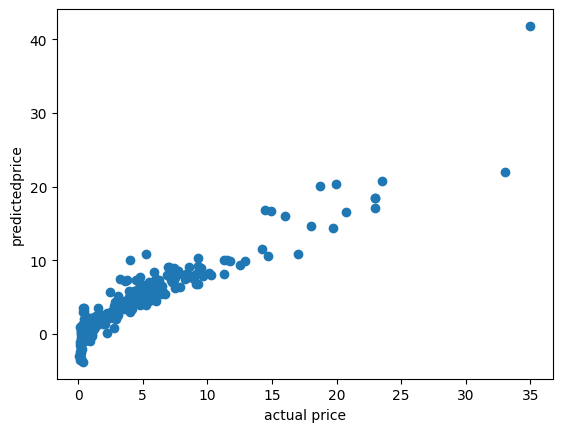

In [87]:
plt.scatter(Y_train,trainingdata)
plt.xlabel("actual price")
plt.ylabel("predictedprice")

In [88]:
testingdata=lr.predict(X_test)

In [89]:
scoretest=metrics.r2_score(Y_test,testingdata)

In [90]:
scoretest

0.8365766715026374

In [104]:
lassoreg=Lasso()

In [105]:
lassoreg.fit(X_train,Y_train)

Lasso()

In [106]:
lassotraining=lassoreg.predict(X_train)

In [108]:
errorscorelasso=metrics.r2_score(Y_train,lassotraining)

In [109]:
errorscorelasso

0.8427856123435794